# Introducción

Carga de librerías:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import gridspec
from scipy.stats import beta, binom

Definición de variables globales para las notas:

In [2]:
__file__ = '01_introduccion.ipynb'

PARENT = os.path.dirname(os.path.abspath(__file__))
ROOT = os.path.dirname(PARENT)

## Aproximando una circunferencia

Uno de los primeros problemas que se pueden abordar con un enfoque de simulación es el de estimar el valor de $\pi$. Esto se puede conseguir simulando una circunferencia unitaria inscrita en un cuadrado.

Para ilustrarlo, primero se puede definir una función para generar datos:

In [3]:
def genera_circulo(n=10):
    circulo = {'rad':np.linspace(start=0, stop=2*np.pi, num=n),
               'x':None,
               'y':None}
    circulo['x'] = np.sin(circulo['rad'])
    circulo['y'] = np.cos(circulo['rad'])
    
    return circulo

Por ejemplo, por defecto se pueden obtener los siguientes datos:

In [4]:
genera_circulo()

{'rad': array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
        3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531]),
 'x': array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
         3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
        -6.42787610e-01, -2.44929360e-16]),
 'y': array([ 1.        ,  0.76604444,  0.17364818, -0.5       , -0.93969262,
        -0.93969262, -0.5       ,  0.17364818,  0.76604444,  1.        ])}

Generando una circunferencia para diferentes valor de $n$, se tiene:

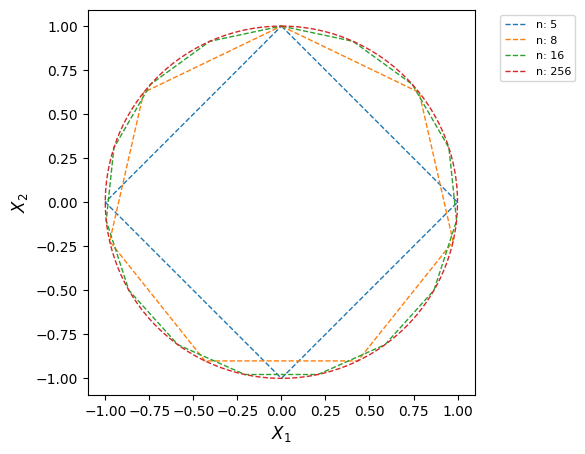

In [5]:
# Generar circunferencias para diferentes valores de n
n = np.array([2**i for i in [2.55, 3, 4, 8]]).astype(int)
circunferencias = {'n': n,
                   'circ': [genera_circulo(n=i) for i in n]}

# Parámteros de figura
plt.figure(figsize=(5,5))
plt.axis('equal')

# Gráficas
for idx in range(n.shape[0]):
    plt.plot(
        circunferencias['circ'][idx]['x'],
        circunferencias['circ'][idx]['y'],
        linestyle='--',
        linewidth=1,
        label=f'n: {circunferencias["n"][idx]}')

# Anotaciones y estilo
plt.xlabel(r'$X_1$', fontsize=12)
plt.ylabel(r'$X_2$', fontsize=12)
plt.legend(fontsize=8, bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

Se puede observar que para valores altos de $n$, las simulaciones de circunferencia empiezan a aproximarse decentemente a una circunferencia real.

# Proceso de inferencia Bayesiana

## Diferentes iniciales

Otro de los aspectos importantes que se deben tener en cuenta cuando se hace inferencia Bayesiana, es que diferentes distribuciones iniciales vana  generar diferentes distribuciones posteriores. 

Por ejemplo, considera un escenario en el que se pregunta la opinión a las personas al respecto de un tema en particular (El tema en sí para este propósito es irrelevante), las posibles respuestas con las que las personas pueden manifestar su opinión son: `0 desacuerdo`, `1 acuerdo`, es decir, son un fenómeno que se puede representar con una distribución $Binomial$. Puedes clasificar la postura de las personas en cuatro posibles categorías:

- Ignorante
- Indiferente
- Informado
- Ingenuo

Cada uno de los anteriores reflejará diferentes distribuciones para el conocimiento inicial del tema en cuestión. Supongamos que este conocimiento puede describirse con una distribución $Beta$, entonces:

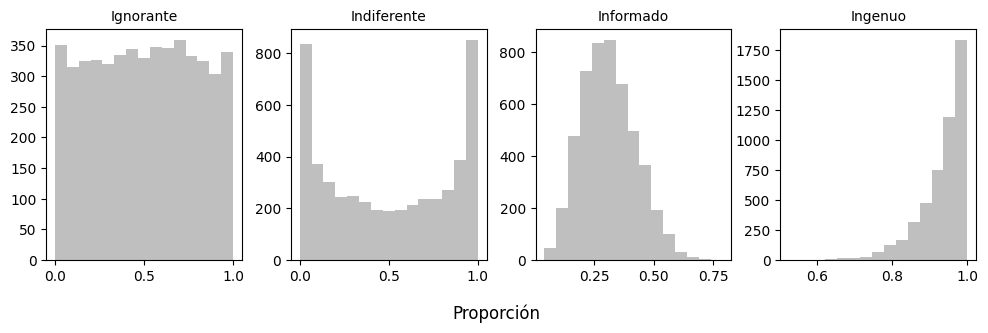

In [6]:
# Almacenar diferentes posturas
iniciales = {
    'postura':['ignorante', 'indiferente', 'informado', 'ingenuo'], 
    'a':np.array([1,0.5,5,14]),
    'b':np.array([1,0.5,11,1]),
    'params_inic':[],
    'params_post':[]}

# Se simulan las diferentes posturas
for idx in range(4):
    a, b = iniciales['a'][idx], iniciales['b'][idx]
    sims = beta.rvs(a=a, b=b, size=5_000)
    
    iniciales['params_inic'].append(sims)

# Gráfica de las posturas
fig = plt.figure(figsize=(12,3))
spec = gridspec.GridSpec(ncols=4, nrows=1, wspace=0.25)

for idx in range(4):
    # Gráficas
    ax = fig.add_subplot(spec[idx])
    ax.hist(x=iniciales['params_inic'][idx], bins=15, color='grey', alpha=0.5)

    # Anotaciones y estilo
    ax.set_title(iniciales['postura'][idx].title(), fontsize=10)

fig.supxlabel(t='Proporción', y=-0.1, fontsize=12)
    
plt.show()

Nótese que en este punto, las diferentes posturas son distribuciones iniciales de la proporción entre `Acuerdo` y `Desacuerdo`, sin embargo, realizar este experimento podría resultar confuso para la gente debido a que no somos buenos pensando en proporciones. Algo que nos resulta más familiar es pensar en el número de casos en los que estaríamos de `Acuerdo`, contra el número de casos en los que estaríamos en `Desacuerdo`.

Dicho en otras palabras, la visualización anterior muestra las distribuciones del espacio parametral (No el fenómeno), pero de igual manera podemos construir las distribuciones previas que se generarían utilizado los parámetros de las inciales (El fenómeno) simulando de una $Binomial$. Para ilustrarlo, sopnemos que se pide la opinión de cada persona al respecto de `33` temas de interés:

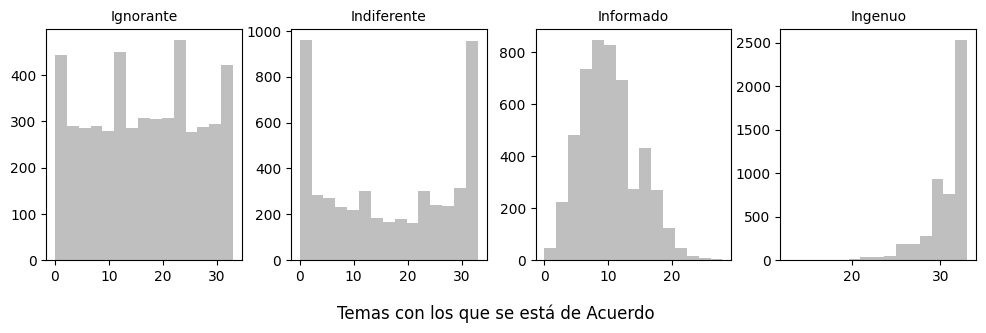

In [7]:
# Función para simular de una binomial 
sim_binom = lambda x: binom.rvs(n=33, p=x, size=1)[0]

# Iniciar objeto para simulaciones
iniciales['sims_binom'] = []

# Simular y almacenar
for idx in range(4):
    sims = np.array(list(map(sim_binom, iniciales['params_inic'][idx])))
    iniciales['sims_binom'].append(sims)

# Gráfica de las posturas
fig = plt.figure(figsize=(12,3))
spec = gridspec.GridSpec(ncols=4, nrows=1, wspace=0.25)

for idx in range(4):
    # Gráficas
    ax = fig.add_subplot(spec[idx])
    ax.hist(x=iniciales['sims_binom'][idx], bins=15, color='grey', alpha=0.5)

    # Anotaciones y estilo
    ax.set_title(iniciales['postura'][idx].title(), fontsize=10)

fig.supxlabel(t='Temas con los que se está de Acuerdo', y=-0.1, fontsize=12)
    
plt.show()

**Nótese** que a diferencia de la visualización anterior, en el eje de las $X$ se muestra valores mayores a **1**. Esto es porque ya no se están simulando parámetros, sino que se están simulando escenarios del fenómeno en cuestión con los parámetros obtenidos de cada una de las posturas, es decir, estas son las `distribuciones predictivas previas`.

## Incorporando los datos

Llegado a este punto, en el cual ya tenemos definidas diferentes posturas para el conocimiento inicial, es un buen momento para incorporar los datos. **IMPORTANTE**: En un proceso de inferencia bayesiana, el conocimiento inicial debe ser construido sin permitir que los datos contaminen las creencias de un tomador de decisiones.

Los datos de este ejemplo son una muestra de los datos originiales de la prueba [Bechdel](https://en.wikipedia.org/wiki/Bechdel_test#:~:text=The%20Bechdel%20test%20%28%2F%20%CB%88b%C9%9Bkd%C9%99l%20%2F%20BEK-d%C9%99l%29%20is,each%20other%20about%20something%20other%20than%20a%20man.)

In [8]:
# Ruta a los datos
datos_path = os.path.join(ROOT, 'datos/movies.csv')

# Extraer muestra
datos = pd.read_csv(datos_path).sample(n=20)

# Agrupar y contar por cats. en binary
datos = datos.groupby(by='binary')[['title']].count()

#Despivotar tabla
datos = datos.T
datos

binary,FAIL,PASS
title,11,9


Para actualizar el conocimiento inicial con los datos, se puede considerar la siguiente regla de actualización:

$$\alpha_{t+1} = \alpha_t + PASS$$
$$\beta_{t+1} = \beta_t + FAIL$$

In [9]:
iniciales['a_post'] = iniciales['a'] + datos['PASS'].values
iniciales['b_post'] = iniciales['b'] + datos['FAIL'].values

# Se simulan las diferentes posturas
for idx in range(4):
    a, b = iniciales['a_post'][idx], iniciales['b_post'][idx]
    sims = beta.rvs(a=a, b=b, size=5_000)
    
    iniciales['params_post'].append(sims)

**Visualizando** el efecto de los datos sobre las diferentes iniciales, se tiene lo siguiente:

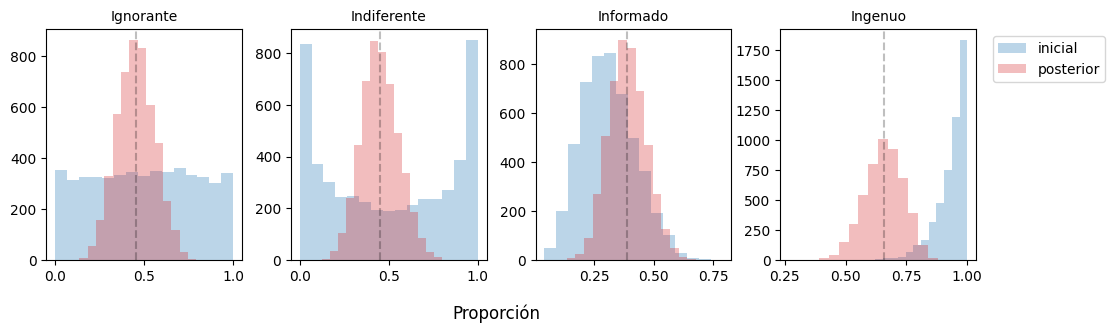

In [10]:
# Gráfica de las posturas
fig = plt.figure(figsize=(12,3))
spec = gridspec.GridSpec(ncols=4, nrows=1, wspace=0.25)

for idx in range(4):
    # Gráficas
    ax = fig.add_subplot(spec[idx])
    ax.hist(x=iniciales['params_inic'][idx], bins=15, color='tab:blue', alpha=0.3, label='inicial')
    ax.hist(x=iniciales['params_post'][idx], bins=15, color='tab:red', alpha=0.3, label='posterior')
    ax.axvline(x=iniciales['params_post'][idx].mean(), color='black', linestyle='--', alpha=0.25)

    # Anotaciones y estilo
    ax.set_title(iniciales['postura'][idx].title(), fontsize=10)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.supxlabel(t='Proporción', y=-0.1, fontsize=12)
    
plt.show()

De la gráfica anterior, se puede ver que al incorporar los datos, todas las posturas de conocimiento resultan alteradas. Si bien esto es un hecho, también es cierto que la medida en la que se ven afectadas por los datos depende del conocimiento inicial, por ejemplo, la postura informada no se vio tan afectada por los datos; en contraste, la postura infenua se vio severamente modificada por los datos

## Muestra de datos

El proceso de inferencia Bayesiana es altamente susceptible a la muestra con la que se actualiza el conocimiento. Tanto el tamaño de la muestra como la aleatoriedad de la misma, son factores que afectan en mayor o menor medida el proceso.

Por ejemplo, veamos el efecto que tiene en el análisis una muestra significativamente más grande. Para ello, consideremos únicamente la postura **informada** ya que parece ser la más cercana al verdader valor. Probamos con diferentes valores de $n$.

In [11]:
# Almacenar diferentes posturas
iniciales = {
    'n':np.array([5,20,50,500]), 
    'params_beta':np.array([5,11]),
    'params_inic':[],
    'params_beta_post':[],
    'params_post':[]}

# Simular parámteros iniciales
for idx in range(4):
    a, b = iniciales['params_beta'][0], iniciales['params_beta'][1]
    sims = beta.rvs(a=a, b=b, size=5_000)
    iniciales['params_inic'].append(sims)
    
# Incorporar datos
for idx in range(4):
    datos = pd.read_csv(datos_path).sample(n=iniciales['n'][idx])
    datos = datos.groupby(by='binary')[['title']].count()
    datos = datos.T
    iniciales['params_beta_post'].append(datos.loc['title'].values)

# Actualizar conocimiento
for idx in range(4):
    a = iniciales['params_beta'][0] + iniciales['params_beta_post'][idx][0]
    b = iniciales['params_beta'][1] + iniciales['params_beta_post'][idx][1]
    sims = beta.rvs(a=a, b=b, size=5_000)
    iniciales['params_post'].append(sims)

Visualizamos

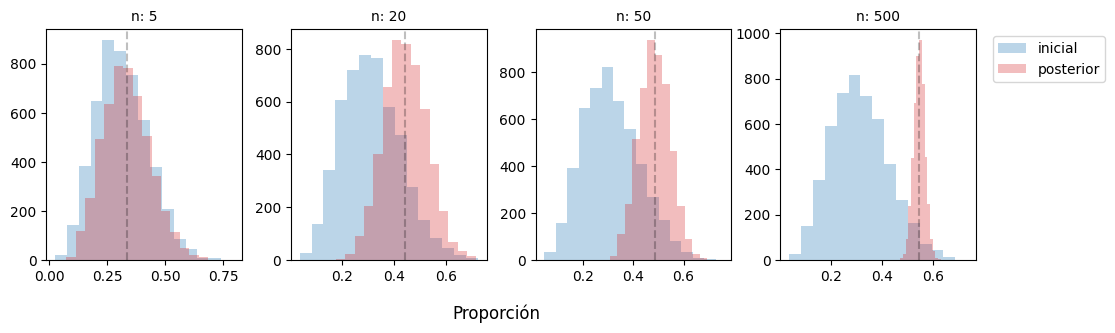

In [13]:
# Gráfica de las posturas
fig = plt.figure(figsize=(12,3))
spec = gridspec.GridSpec(ncols=4, nrows=1, wspace=0.25)

for idx in range(4):
    # Gráficas
    ax = fig.add_subplot(spec[idx])
    ax.hist(x=iniciales['params_inic'][idx], bins=15, color='tab:blue', alpha=0.3, label='inicial')
    ax.hist(x=iniciales['params_post'][idx], bins=15, color='tab:red', alpha=0.3, label='posterior')
    ax.axvline(x=iniciales['params_post'][idx].mean(), color='black', linestyle='--', alpha=0.25)

    # Anotaciones y estilo
    ax.set_title(f"n: {iniciales['n'][idx]}", fontsize=10)

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.supxlabel(t='Proporción', y=-0.1, fontsize=12)
    
plt.show()